In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
data_ceara = pd.read_csv('../data/csv/by_uf/CE.csv', parse_dates=['date'])
(data_ceara
 .tail()
 .rename(columns=lambda c: f'{c} ({data_ceara.dtypes[c]})'))
data_SP = pd.read_csv('../data/csv/by_uf/SP.csv', parse_dates=['date'])
(data_ceara
 .tail()
 .rename(columns=lambda c: f'{c} ({data_ceara.dtypes[c]})'))

,date (datetime64[ns]),suspects (int64),refuses (int64),cases (int64),deaths (int64)
47,2020-03-16,117,153,9,0
48,2020-03-17,161,192,11,0
49,2020-03-18,223,259,20,0
50,2020-03-19,239,271,24,0
51,2020-03-20,253,291,68,0


In [3]:
type(data_ceara)

pandas.core.frame.DataFrame

In [4]:
data_ceara.head()

,date,suspects,refuses,cases,deaths
0,2020-01-30,1,0,0,0
1,2020-01-31,1,0,0,0
2,2020-02-01,1,0,0,0
3,2020-02-02,1,0,0,0
4,2020-02-03,0,1,0,0


In [5]:
data_ceara[data_ceara.duplicated('date', keep=False)]
data_SP[data_SP.duplicated('date', keep=False)]

,date,suspects,refuses,cases,deaths
7,2020-02-06,3,10,0,0
8,2020-02-06,3,10,0,0
27,2020-02-25,4,26,0,0
28,2020-02-25,4,26,0,0
49,2020-03-18,5334,596,240,4
51,2020-03-18,8134,763,396,9


In [6]:
data_ceara.head()

,date,suspects,refuses,cases,deaths
0,2020-01-30,1,0,0,0
1,2020-01-31,1,0,0,0
2,2020-02-01,1,0,0,0
3,2020-02-02,1,0,0,0
4,2020-02-03,0,1,0,0


In [7]:
data_ceara = data_ceara[38:]
data_SP = data_SP[38:]

In [8]:
data_ceara = data_ceara.set_index('date')
data_SP = data_SP.set_index('date')

In [9]:
data_ceara.tail()

,suspects,refuses,cases,deaths
date,,,,
2020-03-16,117,153,9,0
2020-03-17,161,192,11,0
2020-03-18,223,259,20,0
2020-03-19,239,271,24,0
2020-03-20,253,291,68,0


In [10]:
df = pd.DataFrame(data_ceara, 
        index=data_ceara.index, columns=data_ceara.columns)


In [11]:
data_SP['cases'].values

array([ 10,  13,  16,  19,  30,  42,  56,  65, 136, 152, 164, 240, 286,
       396])

In [12]:
df['cases SP']  = data_SP['cases'].values
df['deaths SP'] = data_SP['deaths'].values

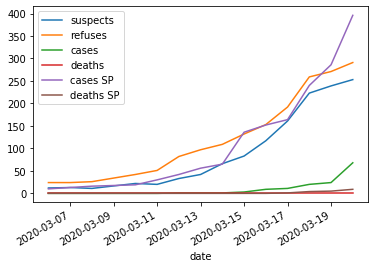

In [13]:
df.plot()

In [14]:
df = df.drop(columns='refuses', axis=1)

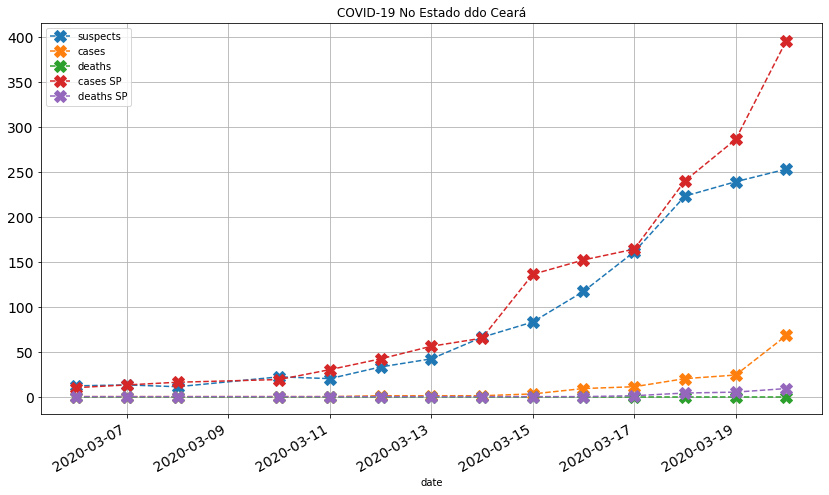

In [15]:
df.plot(style='X--', 
        mark_right=True,
        marker = "X",
        grid=True,
        markersize =12,
        figsize=(14,8), 
        fontsize=14,
        title='COVID-19 No Estado ddo Ceará')

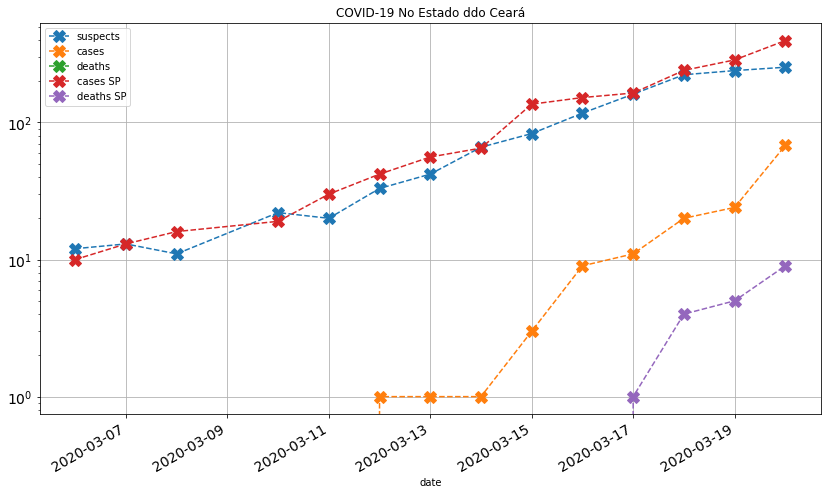

In [16]:
df.plot(style='X--', 
        mark_right=True,
        logy=True,
        marker = "X",
        grid=True,
        markersize =12,
        figsize=(14,8), 
        fontsize=14,
        title='COVID-19 No Estado ddo Ceará')